# Face detection/recognition examples using the Face++ API in Python

Qin Yongliang, 20180409

Long story short: **You can do face detection/recognition with just a working internet connection**. 

Absolutely **NO** Machine Learning, Neural Network or Computer Vision knowledge/expertise required. I mean you can learn those later when you have time; just don't do it now.

You will need Python of course (Python 3.4+ in this case), and the `requests` library to send HTTP requests.

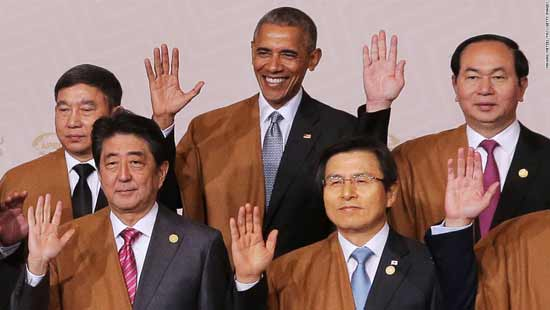

In [1]:
# The `requests` library is the easiest way to make HTTP requests. 
# Install via `pip install requests` if you don't already have it.
import requests

# so i just grabbed this image from the internet
# and put it under current working directory
image_filepath = 'politicians.jpg'

# and display it here so you can see what it looks like
import IPython
IPython.display.Image(filename=image_filepath)

# Please be aware that IPython.display.Image is used here only for convenience; 
# You might want to display images using other methods in your own script.

# Face Detection

Find out **where** all the faces (and optionally, the facial features) are.

In [2]:
# now open the image file in read-binary ('rb') mode, 
# and pass the opened file object to the post() function.

with open(image_filepath, 'rb') as image_file:
    
    # for more detailed information on the API interface, 
    # please (after log into their website) refer to 
    # https://console.faceplusplus.com/documents/5679127
    
    # here an HTTP POST request is constructed and sent to faceplusplus.com's API endpoint.
    response = requests.post(
        'https://api-us.faceplusplus.com/facepp/v3/detect',
        data = {
            # here I use my own API key and secret;
            # you can go to faceplusplus.com and register an account
            # to get your own api_key and api_secret for FREE after email verification.
            'api_key':'GKDiPpGXxPZt0QVYCUUhUHyW1XdviF6z',
            'api_secret':'wsxmlqMWsRYTNTeHMYIXd7i7n9P9cSRS',

            # we want the landmark information (position of facial features)
            'return_landmark':1,
        },
        
        # by specifying the `files` argument below, the `requests` 
        # library will construct a `multipart` request, with 
        # binary file(s) as part of the request.
        files = {
            # pass in the file object here
            'image_file': image_file
        }
    )

# everything should just work if you are connected to the internet.

# print the raw text of the response:
print(response.text)

{"image_id": "qMyH3Y3LJaA7amSbqwW1NQ==", "request_id": "1523217416,1564c198-f823-48bc-becc-09021b3f88ca", "time_used": 207, "faces": [{"landmark": {"mouth_upper_lip_left_contour2": {"y": 207, "x": 341}, "mouth_upper_lip_left_contour3": {"y": 208, "x": 342}, "mouth_lower_lip_right_contour3": {"y": 211, "x": 353}, "mouth_upper_lip_left_contour1": {"y": 205, "x": 345}, "left_eye_upper_left_quarter": {"y": 182, "x": 333}, "left_eyebrow_lower_middle": {"y": 177, "x": 333}, "contour_chin": {"y": 229, "x": 350}, "left_eyebrow_lower_left_quarter": {"y": 178, "x": 329}, "right_eyebrow_lower_left_quarter": {"y": 176, "x": 357}, "mouth_lower_lip_right_contour1": {"y": 208, "x": 354}, "mouth_lower_lip_left_contour2": {"y": 211, "x": 340}, "left_eye_bottom": {"y": 183, "x": 336}, "mouth_lower_lip_bottom": {"y": 211, "x": 348}, "contour_left9": {"y": 228, "x": 343}, "mouth_lower_lip_top": {"y": 208, "x": 348}, "right_eyebrow_upper_middle": {"y": 172, "x": 362}, "right_eyebrow_left_corner": {"y": 176

In [3]:
# what is this jibberish? the response text seems to be in JSON format.
# let's now read it with a JSON reader.
import json
response_json = json.loads(response.text)

# pretty printer
import pprint
pprint = pprint.PrettyPrinter().pprint

# now that's more like it.
pprint(response_json)

{'faces': [{'face_rectangle': {'height': 61,
                               'left': 324,
                               'top': 169,
                               'width': 61},
            'face_token': 'bc646cb750654a5661506333c17bbe81',
            'landmark': {'contour_chin': {'x': 350, 'y': 229},
                         'contour_left1': {'x': 325, 'y': 185},
                         'contour_left2': {'x': 325, 'y': 191},
                         'contour_left3': {'x': 325, 'y': 197},
                         'contour_left4': {'x': 326, 'y': 203},
                         'contour_left5': {'x': 327, 'y': 210},
                         'contour_left6': {'x': 329, 'y': 216},
                         'contour_left7': {'x': 332, 'y': 221},
                         'contour_left8': {'x': 337, 'y': 225},
                         'contour_left9': {'x': 343, 'y': 228},
                         'contour_right1': {'x': 385, 'y': 181},
                         'contour_right2': {'x': 385, 'y'

# Visualization of Detection Results

Okay, we got the result of the Detection API. But how do we know if it's correct?

We will now visualize this response by painting on top of the original image using the `opencv-python` package,
to give you a sense of how the algorithm is doing.

On Ubuntu you can simply run `pip install opencv-python`; On other platforms there may or maynot be suitable `opencv-python` package in `pip` for your Python version. Just skip this part if you can't install it; it's okay.

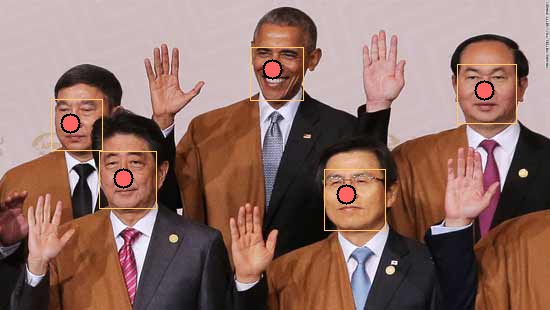

In [4]:
import cv2

# read the image into an numpy array
# so we can paint it using opencv
img = cv2.imread(image_filepath)
assert img is not None 

# a number of faces were detected
for face in response_json['faces']:
    
    # the bounding box of each detected face
    rect = face['face_rectangle']
    
    # nose tip position of each detected face
    nose_tip = face['landmark']['nose_tip']
    
    # draw yellow rectangles around faces.
    cv2.rectangle(
        img, 
        (rect['left'], rect['top']), 
        (rect['left']+rect['width'], rect['top']+rect['height']),
        (100,200,255),
        1,
    )
    
    # draw red circles on noses.
    # black shadow first;
    cv2.circle(
        img,
        (nose_tip['x'], nose_tip['y']),
        10, # radius
        (0,0,0),
        -1,
    )
    # then red foreground.
    cv2.circle(
        img,
        (nose_tip['x'], nose_tip['y']),
        8, # radius
        (100,100,255),
        -1,
    )
    
# encode the painted image into JPEG format
success, encoded = cv2.imencode('.jpg', img)

# hand the encoded image to IPython for display
IPython.display.Image(data=encoded, format='jpg')

# See? 

The result is correct, and the process is simple.



In [5]:
# save the image
cv2.imwrite('politicians_detected.jpg', img)

True

# Face Recognition

Now let's find out **who** were in the image.

First, you have to know what a `face_token` is:

In [6]:
# everytime a face is detected in an image, a `face_token` is generated for that face.
# after running the example above, we detected a total 
# of 5 faces, each having a `face_token` as their unique ID.

for idx, face in enumerate(response_json['faces']):
    print('face_token of detected face #{} is {}'.format(idx, face['face_token']))

face_token of detected face #0 is bc646cb750654a5661506333c17bbe81
face_token of detected face #1 is d3944b20794a3ecf8721cc104b62b7f3
face_token of detected face #2 is 7ae1c403124abde249ac471d40d9b948
face_token of detected face #3 is d3d88e65a29d0f88c672bf1dea05f527
face_token of detected face #4 is 498bc9cb2c1e23b8323a8e4d15053a94


# Create a Face Database

Basically, if we have a database of all the politicians and their faces, 
we can compare these five politicians' face with those in the database and find out who they are.

Good news: you can create such a database using faceplusplus.com's `FaceSet` API. Simply create a `faceset` and add faces into it in the form of `face_token`s.

All created `faceset`s will be stored on faceplusplus.com's cloud, allowing you to query them anytime anywhere.

Xi Jinping

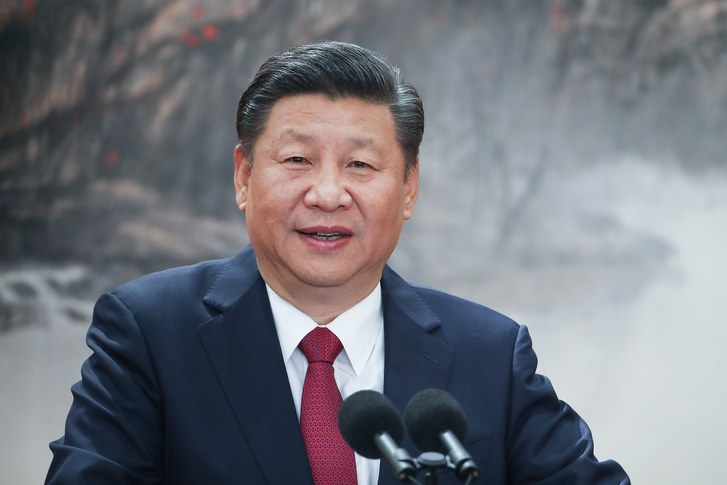

Barack Obama

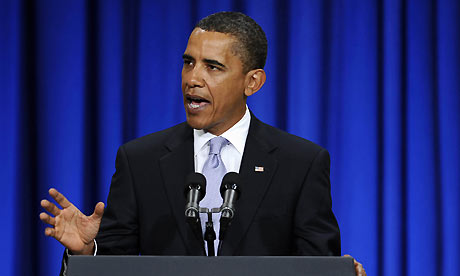

Abe Shinzo

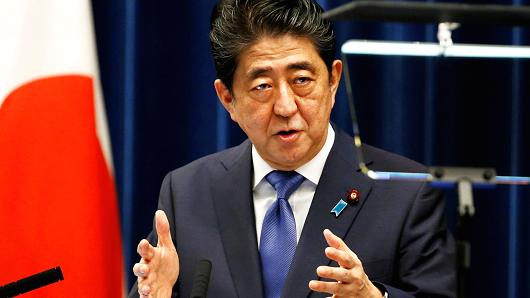

In [7]:
# in order to build a database of politicians, i obtained
# a bunch of photos of politicians from the internet
politician_data = [
    {
        'name':'Xi Jinping',
        'url':'https://media.newyorker.com/photos/5a94746cacbab20be85abab2/master/w_727,c_limit/Osnos-Xi-Jinping-May-Be-President-for-Life.jpg',
    },
    {
        'name':'Barack Obama',
        'url':'https://static.guim.co.uk/sys-images/Business/Pix/pictures/2009/9/14/1252944972087/US-president-Barack-Obama-001.jpg'
    },
    {
        'name':'Abe Shinzo',
        'url':'https://fm.cnbc.com/applications/cnbc.com/resources/img/editorial/2017/09/25/104729491-RTS1DNJJ-shinzo-abe.530x298.jpg'
    }
]

# display them down here
for p in politician_data:
    m = IPython.display.Markdown(data=p['name'])
    IPython.display.display(m)
    
    i = IPython.display.Image(url=p['url'], width=200, embed=True)
    IPython.display.display(i)

In [8]:
# detect the first face within a photo and return its `face_token`.
def tokenize(image_url):
    response = requests.post(
        'https://api-us.faceplusplus.com/facepp/v3/detect',
        data = {
            'api_key':'GKDiPpGXxPZt0QVYCUUhUHyW1XdviF6z',
            'api_secret':'wsxmlqMWsRYTNTeHMYIXd7i7n9P9cSRS',

            # instead of uploading the image file, here we specify
            # only the URL of the image, essentially asking
            # the API to download the image themselves
            'image_url':image_url,
        },
    )
    jr = json.loads(response.text)
    return jr['faces'][0]['face_token']

# do this for all politicians (they deserve it).
for p in politician_data:
    face_token = tokenize(p['url'])
    p['face_token'] = face_token

Xi Jinping (face_token: a72806b0412725002bee3a032b6aa6fd)

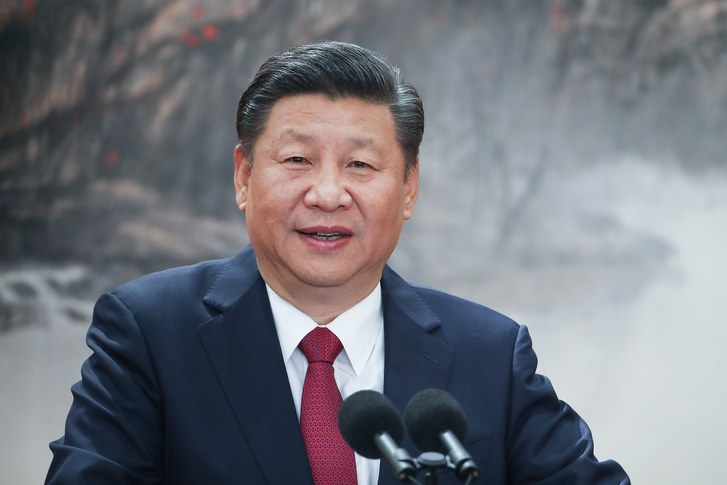

Barack Obama (face_token: 496e1a413d44a2d4e2e78a624269e866)

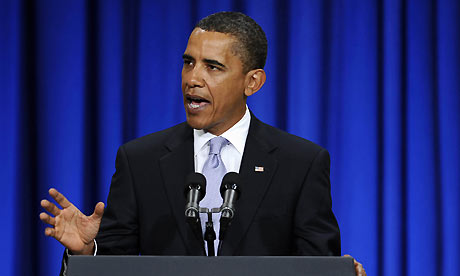

Abe Shinzo (face_token: 2ab67945bcc320d9e01c77da2c0ffe7a)

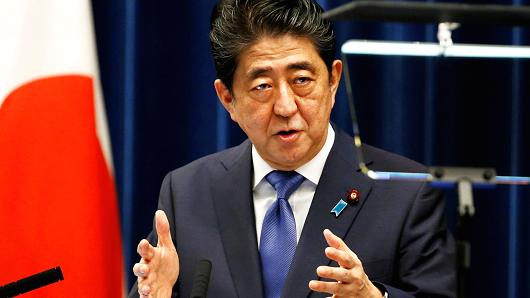

In [9]:
# now every politician got their own face_token
for p in politician_data:
    m = IPython.display.Markdown(data=p['name']+' (face_token: {})'.format(p['face_token']))
    IPython.display.display(m)
    
    i = IPython.display.Image(url=p['url'], width=200, embed=True)
    IPython.display.display(i)

In [10]:
# create a faceset(a database of faces) given a name
def create_faceset(faceset_name):
    resp = requests.post(
        'https://api-us.faceplusplus.com/facepp/v3/faceset/create',
        data = {
            'api_key':'GKDiPpGXxPZt0QVYCUUhUHyW1XdviF6z',
            'api_secret':'wsxmlqMWsRYTNTeHMYIXd7i7n9P9cSRS',
            'outer_id': faceset_name,
            'force_merge': 1, # what to do if faceset_name already exists
        }
    )
    jr = json.loads(resp.text)
    print('faceset "{}" created'.format(
        jr['outer_id']
    ))

# add a face into a faceset, given its face_token
def add_face_to_faceset(face_token, faceset_name):
    resp = requests.post(
        'https://api-us.faceplusplus.com/facepp/v3/faceset/addface',
        data = {
            'api_key':'GKDiPpGXxPZt0QVYCUUhUHyW1XdviF6z',
            'api_secret':'wsxmlqMWsRYTNTeHMYIXd7i7n9P9cSRS',
            
            'outer_id': faceset_name,
            'face_tokens': face_token,
        }
    )
    jr = json.loads(resp.text)
    print('face {} added to faceset "{}" ({} faces total)'.format(
        face_token,
        jr['outer_id'],
        jr['face_count'],
    ))

# because I (or you) might run this code several times to experiment with
# various functionalities, you have to delete previously created faceset
# before creating a new one with the same name to avoid conflict.
def delete_faceset(faceset_name):
    resp = requests.post(
        'https://api-us.faceplusplus.com/facepp/v3/faceset/delete',
        data = {
            'api_key':'GKDiPpGXxPZt0QVYCUUhUHyW1XdviF6z',
            'api_secret':'wsxmlqMWsRYTNTeHMYIXd7i7n9P9cSRS',

            'outer_id': faceset_name,
            'check_empty': 0, # delete even if faceset is not empty
        }
    )
    if not ('error_message' in resp.text):
        print('faceset "{}" successfully deleted'.format(faceset_name))
    else:
        print('faceset "{}" failed to delete'.format(faceset_name))
        print(resp.text)
    
delete_faceset('politician_faceset')

# create a FaceSet(a database of faces) named 'politician_faceset'
create_faceset('politician_faceset')

# add all 3 politicians' faces into it,
# one after another
for p in politician_data:
    add_face_to_faceset(p['face_token'], 'politician_faceset')

faceset "politician_faceset" successfully deleted
faceset "politician_faceset" created
face a72806b0412725002bee3a032b6aa6fd added to faceset "politician_faceset" (1 faces total)
face 496e1a413d44a2d4e2e78a624269e866 added to faceset "politician_faceset" (2 faces total)
face 2ab67945bcc320d9e01c77da2c0ffe7a added to faceset "politician_faceset" (3 faces total)


# Face Recognition: Search

Now we have:

- a faceset (face database) named 'politician_faceset' on faceplusplus.com's cloud, containing 3 politicians' **face_tokens**.
- a python dictionary named 'politician_data', containing 3 politicians' **names** and **face_tokens**.
- 5 unknown faces extracted from a group photo, each with its **face_token**.

And we want to know who each of these 5 faces belongs to. The procedure is as follows:

For each unknown face we want to recognize:
1. give the unknown face's face_token to faceplusplus.com and ask it to search 'politician_faceset' for faces that looked most similar to the unknown face using the `Search` API.  (It's like searching a police database for suspects in Hollywood movies; except this time we are doing it for real)
  
2. faceplusplus will respond you with the matches it has found, in the form of the matching faces' face_tokens, along with a confidence score (how alike the two faces are).

3. match the face_token to the politicians' name using the 'politician_data' dictionary.

In [11]:
# given the face_token in question, 
# return the most similar face(s) from a specific faceset
def search_face(face_token_in_question, faceset_name):
    resp = requests.post(
        'https://api-us.faceplusplus.com/facepp/v3/search',
        data = {
            'api_key':'GKDiPpGXxPZt0QVYCUUhUHyW1XdviF6z',
            'api_secret':'wsxmlqMWsRYTNTeHMYIXd7i7n9P9cSRS',

            'outer_id': faceset_name, # search within this faceset
            'face_token': face_token_in_question, # for this face
        },
    )
    return json.loads(resp.text)

matches = {}
thresholds = None

# for each of the 5 faces we previously detected
for face in response_json['faces']:
    # the face_token of the face we are about to search for.
    face_token_in_question = face['face_token']
    print('-'*20)
    print('searching for face "{}" in politician_faceset...'.format(face_token_in_question))
    
    # do the search
    face_search_result = search_face(face_token_in_question, 'politician_faceset')
    best_match = face_search_result['results'][0]
    pprint(best_match)
    
    # thresholds (will explain later)
    thresholds = face_search_result['thresholds']
    
    # the confidence of the best match (0-100).
    confidence = best_match['confidence']
    
    # the face_token of the best match.
    face_token_best_match = best_match['face_token']
    
    # find out to whom this face_token belongs.
    name = [p['name'] for p in politician_data if p['face_token']==face_token_best_match][0]
    
    print('best match: "{}", name: "{}", confidence:"{}"'.format(
        face_token_best_match, name, confidence))
    
    best_match['name'] = name
    matches[face_token_in_question] = best_match

--------------------
searching for face "bc646cb750654a5661506333c17bbe81" in politician_faceset...
{'confidence': 28.748,
 'face_token': 'a72806b0412725002bee3a032b6aa6fd',
 'user_id': ''}
best match: "a72806b0412725002bee3a032b6aa6fd", name: "Xi Jinping", confidence:"28.748"
--------------------
searching for face "d3944b20794a3ecf8721cc104b62b7f3" in politician_faceset...
{'confidence': 32.91,
 'face_token': 'a72806b0412725002bee3a032b6aa6fd',
 'user_id': ''}
best match: "a72806b0412725002bee3a032b6aa6fd", name: "Xi Jinping", confidence:"32.91"
--------------------
searching for face "7ae1c403124abde249ac471d40d9b948" in politician_faceset...
{'confidence': 89.691,
 'face_token': '2ab67945bcc320d9e01c77da2c0ffe7a',
 'user_id': ''}
best match: "2ab67945bcc320d9e01c77da2c0ffe7a", name: "Abe Shinzo", confidence:"89.691"
--------------------
searching for face "d3d88e65a29d0f88c672bf1dea05f527" in politician_faceset...
{'confidence': 85.648,
 'face_token': '496e1a413d44a2d4e2e78a624269e

# Visualization of Recognition Results

We just found the best matches for the unknown faces in the politician group photo. We will now visualize the result, just to be sure.

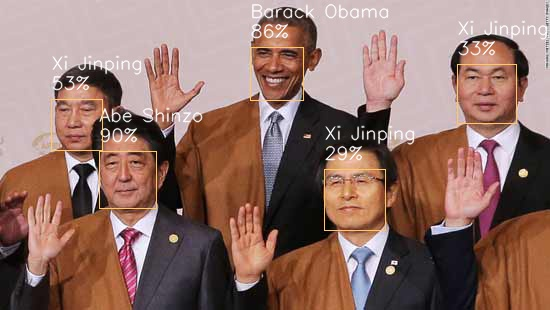

In [12]:
def visualize_matches():
    img = cv2.imread(image_filepath)
    assert img is not None 

    # for all faces detected in the group photo
    for face in response_json['faces']:

        # the bounding box of each detected face
        rect = face['face_rectangle']

        # the name and confidence score
        match = matches[face['face_token']]
        name = match['name']
        confidence = match['confidence']
        
        # draw yellow rectangles around faces.
        cv2.rectangle(
            img, 
            (rect['left'], rect['top']), 
            (rect['left']+rect['width'], rect['top']+rect['height']),
            (100,200,255),
            1,
        )

        # text
        cv2.putText(img, 
            name,
            (rect['left'], rect['top']-30),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=.6,
            color = (255,255,255),
            thickness=1,
            lineType = cv2.LINE_AA,
        )
        cv2.putText(img, 
            '{:2.0f}%'.format(confidence),
            (rect['left'], rect['top']-10),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=.6,
            color = (255,255,255),
            thickness=1,
            lineType = cv2.LINE_AA,
        )
        
    # encode the painted image into JPEG format
    success, encoded = cv2.imencode('.jpg', img)

    # hand the encoded image to IPython for display
    i = IPython.display.Image(data=encoded, format='jpg')
    IPython.display.display(i)
    
visualize_matches()

# Understanding Confidence

As you can see above, the name and confidence score of the matches are displayed alongside the 5 detected faces.

For those of you who know nothing about politics: 

- The dark-skinned male (Barack Obama) in the center was the 44th President of The United States.
- The light-skinned male (Abe Shinzo) in the bottom left, at the time of this writing, is the 57th Prime Minister of Japan.
- The rest are all Japanese officials, but they are not in our politician database.
- Xi Jinping, the current supreme leader of People's Republic of China, was not in this photo.

It's easy to see from the confidence scores above, that those Japanese officials' faces are more similar to Xi Jinping's than Abe Shinzo's. However the confidence score is very low - meaning that we can be very sure that those faces do not actually belong to Xi Jinping.

When designing face recognition systems, a 'confidence threshold' has to be specified. If the confidence score of the closest match is lower than the threshold, we can simply say 'no match' instead of going for the closest match.

Below is an example of how 'confidence threshold' is used.

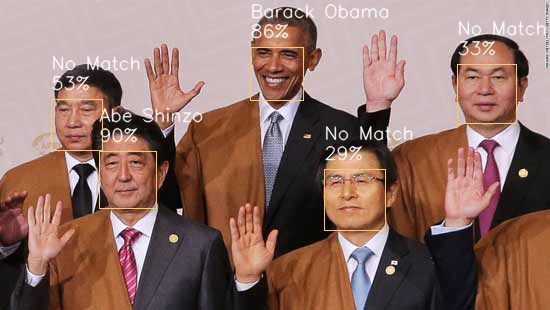

In [13]:
def visualize_matches_with_confidence(threshold):
    img = cv2.imread(image_filepath)
    assert img is not None 

    # for all faces detected in the group photo
    for face in response_json['faces']:

        # the bounding box of each detected face
        rect = face['face_rectangle']

        # the name and confidence score
        match = matches[face['face_token']]
        name = match['name']
        confidence = match['confidence']
        
        # draw yellow rectangles around faces.
        cv2.rectangle(
            img, 
            (rect['left'], rect['top']), 
            (rect['left']+rect['width'], rect['top']+rect['height']),
            (100,200,255),
            1,
        )

        # text
        cv2.putText(img, 
            name if confidence>threshold else 'No Match',
            (rect['left'], rect['top']-30),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=.6,
            color = (255,255,255),
            thickness=1,
            lineType = cv2.LINE_AA,
        )
        cv2.putText(img, 
            '{:2.0f}%'.format(confidence),
            (rect['left'], rect['top']-10),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=.6,
            color = (255,255,255),
            thickness=1,
            lineType = cv2.LINE_AA,
        )
    # save to disk (optional)
    cv2.imwrite('politicians_recognized.jpg', img)    
        
    # encode the painted image into JPEG format
    success, encoded = cv2.imencode('.jpg', img)

    # hand the encoded image to IPython for display
    i = IPython.display.Image(data=encoded, format='jpg')
    IPython.display.display(i)
    
visualize_matches_with_confidence(70)

# Understanding Confidence Threshold

As seen above, a confidence threshold of 70% did the job. 

If we increase the confidence threshold to 87%, Barack Obama will be considered a No-Match (a **miss**); 

On the other hand, If we decrease the confidence threshold to 50%, then the guy on the left will be recognized as Xi Jinping (a **mistake**).

One might ask, what's the optimal confidence threshold for a specific face recognition system?

Comparing to recognizing one person out of 3 (our case), it's much more common to have two or more people that look alike when trying to recognize one person out of 10,000. So in order to avoid mistakes (increase accuracy, important for security applications), a higher confidence threshold is needed; But for applications with less demand in accuracy (like video games), we might want to lower the confidence threshold, such that the system experiences less misses (increases recall) when the input varies in luminosity/angle/distance, providing a better user experience.

The threshold is related not only to the desired error rate and the number of faces in the database, but also to the variance of faces in the database (or `faceset`s in our case). If the database consists mainly of women with makeup (every face looked alike), we will need a higher threshold to achieve the same accuracy than with a database of middle aged men.

Also, since behind every face recognition system there is a machine learning system, a stronger system (better at distinguishing different faces) will produce confidence scores with lower variance, therefore can achieve the same accuracy using a lower threshold.

Finally, a confidence of 50% does not necessarily mean the system is 50% sure about a match - the confidence score might not be linear to the actual conditional probability.

Sounds complicated. That's why for each search query to a `faceset`, faceplusplus will respond with a `threshold` dictionary, allowing system designers to choose the optimal threshold value for his specific purpose.

In [14]:
# in our case
print(thresholds)

{'1e-4': 69.101, '1e-3': 62.327, '1e-5': 73.975}


As suggested by the API, for an error rate of 0.001% (1e-5, one in a hundred thousand), a threshold of 73.975% should be used.